# Fashion-MNIST-Functional-Adam
In this case a NN is built using pytorch defining a class for the architecture and then the functional module is used. It is the most common and concise way to build a NN but it is a bit harder to grasp and manipulate than the use of a class without the module.

Dropout is also used to improve test results.

As optimizer is used the adaptive moment estimation (Adam) which in this case gives better results than regular SGD.

### Importing the libraries and loading the data

In [0]:
# Importing libraries
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim
from torchvision import datasets, transforms
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import helper
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

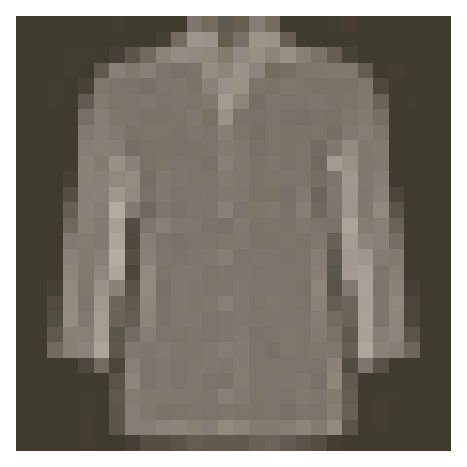

In [2]:
#Viewing the images
image, label = next(iter(trainloader))
helper.imshow(image[0,:])

### Defining the architecture of the network 

In [0]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        # Dropout module with 0.2 drop probability
        self.dropout = nn.Dropout(p=0.2)        
    def forward(self, x):
        # make sure input tensor is flattened
        x = x.view(x.shape[0], -1)        
        # Now with dropout
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.dropout(F.relu(self.fc3(x)))
        # output so no dropout
        x = F.log_softmax(self.fc4(x), dim=1)        
        return x
# Define the loss and optimizer
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

### Training and validation

In [4]:
epochs = 12
steps = 0
train_losses, test_losses = [], []



images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)
images.resize_(64, 784) 

for e in range(epochs):
    running_loss = 0
    running_loss_test = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        #images = images.view(images.shape[0], -1)
        # Training
        #images, labels = next(iter(trainloader))
        #images.resize_(64, 784)        
        optimizer.zero_grad()      
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        loss.backward()
        optimizer.step()        
        running_loss += loss.item()        
    else:
        #Showing the training loss
        print(f"Training loss: {running_loss/len(trainloader)}")        
          
        # turn off gradients
        with torch.no_grad():        
            # set model to evaluation mode
            model.eval()
            # validation pass here
            for images, labels in testloader:
                images, labels = next(iter(testloader))
                #Showing the test loss
                log_ps_test = model(images)
                loss_test = criterion(log_ps_test, labels)
                running_loss_test += loss_test.item()
            else:
                print(f"Test loss: {running_loss_test/len(testloader)}")
                #To calculate accuracy
                # Get the class probabilities
                ps = torch.exp(model(images))
                #To obtain the class with the highest probability using method ps.topk
                top_p, top_class = ps.topk(1, dim=1)
                #Now we want to check that the class obtained in the probabilities with the model correspond to the labels
                equals = top_class == labels.view(*top_class.shape)
                #Accuracy is a mean of how much the model got right
                accuracy = torch.mean(equals.type(torch.FloatTensor))               
                print(f'Accuracy: {accuracy.item()*100}%')            
                # set model back to train mode
                model.train()    



Training loss: 0.6058934122514623
Test loss: 0.48726597191042204
Accuracy: 79.6875%
Training loss: 0.48087013914768123
Test loss: 0.43628091417300474
Accuracy: 84.375%
Training loss: 0.4507586882153808
Test loss: 0.42812372013262123
Accuracy: 79.6875%
Training loss: 0.44020174086284536
Test loss: 0.4110279325277183
Accuracy: 79.6875%
Training loss: 0.41782081699066326
Test loss: 0.4050802050312613
Accuracy: 79.6875%
Training loss: 0.4057440357421761
Test loss: 0.4110458007284031
Accuracy: 90.625%
Training loss: 0.3993343738700027
Test loss: 0.39019474339712956
Accuracy: 79.6875%
Training loss: 0.3944976732992668
Test loss: 0.39332475266449013
Accuracy: 81.25%
Training loss: 0.390349589018171
Test loss: 0.4181192511585867
Accuracy: 85.9375%
Training loss: 0.3826696743080611
Test loss: 0.4049247342879605
Accuracy: 76.5625%
Training loss: 0.3833933509012529
Test loss: 0.3825531988197072
Accuracy: 81.25%
Training loss: 0.3857442776499781
Test loss: 0.38890763405401996
Accuracy: 87.5%


### Inference: Remember to use model.eval() and torch.no_grad()

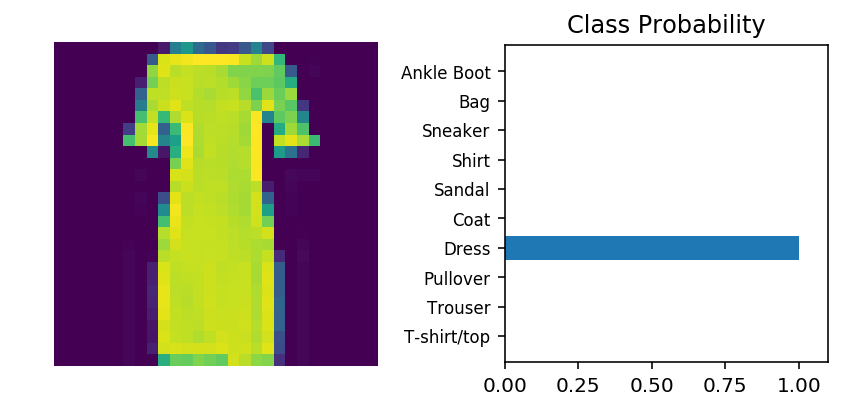

In [5]:
model.eval()
images, labels = next(iter(testloader))
img = images[0]
# Convert 2D image to 1D vector
img = img.view(1, 784)
# Calculate the class probabilities (softmax) for img
with torch.no_grad():
    output = model.forward(img)
ps = torch.exp(output)
# Plot the image and probabilities
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')